# Predicting Congestive Heart Failure: LogisticRegression & GradientDescent
## Agenda
- Import Libraries & Data
- Basic EDA
- Data Prep (Dummify Categories & Normalize Numerical Values)
- Logistic Regression Model
- Regularized Logistic Regression
- Optimization: GridSearchCV
- Adjusting Cutoff Threshold
- ElasticNet
- Gradient Descent

## Import libraries and data.

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 200
pd.options.display.max_rows = 150

In [3]:
chf = pd.read_csv('CHF_Adults_Imputed_2019-09-16.csv').drop(labels = 'Unnamed: 0', axis = 1)

## Basic EDA

In [4]:
chf.sample(10)

,SUBJECT_ID,GENDER,EXPIRE_FLAG,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,CHF,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,AGE
33714,95004,M,0,9.0,-9.0,27.0,7.8,30.0,94.0,0.7,109.0,23.0,8.2,1.1,27.8,32.6,83.0,1.5,12.8,26.9,2.2,255.0,3.8,12.7,2.77,132.0,8.0,6.3,47.0,6.92,67.0,11.090909,1.166667,30.272727,8.480000,31.666667,101.090909,0.863636,129.000000,10.172727,1.150000,28.990909,84.454545,1.850000,13.500000,27.200000,3.230000,411.818182,4.327273,3.517273,138.090909,14.636364,12.709091,69.333333,7.280000,93.000000,15.0,6.0,34.0,9.2,33.0,107.0,1.3,174.0,34.9,12.2,1.2,30.2,35.8,87.0,2.0,14.2,27.5,4.6,620.0,5.1,13.9,4.14,141.0,22.0,18.4,137.0,7.40,131.0,1.921174,5.344779,2.053821,0.509466,1.505545,3.832872,0.206265,26.668333,1.148121,0.070711,0.803062,1.439697,0.171594,0.989949,0.424264,0.905600,107.248140,0.440661,0.422873,3.207945,5.554687,4.668716,33.744135,0.183630,24.996000,0.0,Medicare,ENGL,UNKNOWN,SINGLE,OTHER,44
30846,93515,F,1,23.0,-23.0,7.0,7.5,8.0,109.0,1.3,89.0,21.5,7.0,1.5,28.9,31.8,83.0,1.6,17.2,45.7,5.6,54.0,4.0,14.8,2.42,142.0,16.0,8.5,27.0,7.03,67.0,26.000000,-11.062500,14.000000,8.500000,15.375000,112.000000,1.766667,130.750000,9.033333,1.860000,29.650000,86.833333,1.933333,20.220000,83.600000,6.300000,94.285714,4.350000,3.040000,150.000000,19.000000,11.150000,32.687500,7.249412,145.250000,31.0,-5.0,19.0,9.5,20.0,117.0,2.1,187.0,32.2,11.0,2.5,30.5,35.8,91.0,2.2,26.0,150.0,7.0,133.0,4.7,16.1,3.71,155.0,22.0,14.5,37.0,7.37,458.0,4.358899,5.297405,6.244998,1.414214,3.593976,3.559026,0.416333,41.039615,1.664532,0.403733,0.641093,2.857738,0.305505,3.535817,46.674136,0.989949,31.175387,0.351188,0.518960,5.944185,3.000000,2.221486,2.750000,0.098455,116.039361,0.0,Medicare,ENGL,UNKNOWN,MARRIED,UNABLE TO OBTAIN,84
21770,47398,F,0,9.0,7.0,27.0,8.5,34.0,94.0,0.5,94.0,23.4,7.0,1.1,26.3,28.6,87.0,1.7,12.0,31.6,2.1,201.0,3.0,14.6,2.60,137.0,18.0,4.1,48.0,7.38,46.0,12.826087,10.857143,32.782609,10.010000,40.000000,100.680000,0.747826,111.608696,8.275000,1.233333,26.812500,90.500000,2.139130,13.200000,34.366667,3.655000,303.812500,3.732000,3.088750,142.440000,35.956522,7.262500,59.000000,7.421250,79.000000,17.0,13.0,39.0,11.9,42.0,108.0,1.0,142.0,31.7,9.1,1.4,27.4,30.8,93.0,2.6,14.7,39.0,5.3,378.0,4.3,15.5,3.41,150.0,57.0,12.6,67.0,7.46,105.0,2.289346,2.035401,3.175997,0.997312,2.768875,3.965686,0.144189,13.327140,0.730753,0.086603,0.318067,1.414214,0.258912,0.844097,2.672546,1.011760,58.341773,0.318486,0.290101,3.697747,14.763217,2.274753,6.324555,0.032266,24.819347,1.0,Medicare,ENGL,UNKNOWN,POSTMARRIED,PORTUGUESE,85
28353,25663,M,0,12.0,2.0,27.0,8.5,25.0,102.0,0.9,63.0,37.8,12.9,0.8,29.9,32.5,87.0,1.5,11.0,60.0,2.5,144

In [5]:
chf.isnull().sum()[chf.isnull().sum() >0]

Series([], dtype: int64)

In [6]:
chf.shape

(38550, 116)

In [7]:
chf.describe()

,SUBJECT_ID,EXPIRE_FLAG,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,CHF,AGE
count,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000
mean,38265.302438,0.406719,10.222361,-4.297898,20.650589,7.794397,21.656596,98.040104,0.877667,86.770005,27.276208,9.287608,1.112729,29.071803,32.366789,86.575512,1.675648,12.906525,27.706608,2.448504,160.535863,3.450026,13.996423,3.079797,133.956887,14.384280,6.861446,34.905136,7.310050,82.279689,13.660206,-0.406291,25.387164,8.538346,25.494863,103.914686,1.268379,129.540681,11.024282,1.403577,30.242685,89.659759,2.022627,15.063795,37.824642,3.450427,240.650081,4.117216,3.661426,138.778216,24.077312,10.825984,41.101759,7.385781,141.180737,18.225785,3.184441,29.799671,9.304428,29.399980,109.855694,1.902358,218.210169,38.940576,13.097572,2.237962,31.428615,35.119787,93.047792,2.462335,20.194477,60.430091,4.730983,358.954423,5.085314,16.021100,4.353061,143.302387,38.082594,17.339654,49.476316,7.447686,241.810195,2.430540,2.711110,2.827964,0.512459,2.824247,3.612573,0.305159,36.321139,1.176852,0.333346,0.735095,2.031003,0.247106,2.256855,10.729242,0.761292,62.493605,0.459394,0.394128,2.801228,7.238520,3.184816,4.555241,0.043703,53.269368,0.254942,63.609831
std,29378.495188,0.491228,2.779253,7.258773,4.514196,0.861776,4.817098,5.861701,0.734521,28.037

In [8]:
chf.CHF.value_counts()

0.0    28722
1.0     9828
Name: CHF, dtype: int64

In [9]:
#Baseline Accuracy 25.5%
#Or 74.5% Majority Class
9828/len(chf.CHF)

0.25494163424124516

In [10]:
chf.dtypes

SUBJECT_ID                    int64
GENDER                       object
EXPIRE_FLAG                   int64
Anion Gapmin                float64
Base Excessmin              float64
Bicarbonatemin              float64
Calcium, Totalmin           float64
Calculated Total CO2min     float64
Chloridemin                 float64
Creatininemin               float64
Glucosemin                  float64
Hematocritmin               float64
Hemoglobinmin               float64
INR(PT)min                  float64
MCHmin                      float64
MCHCmin                     float64
MCVmin                      float64
Magnesiummin                float64
PTmin                       float64
PTTmin                      float64
Phosphatemin                float64
Platelet Countmin           float64
Potassiummin                float64
RDWmin                      float64
Red Blood Cellsmin          float64
Sodiummin                   float64
Urea Nitrogenmin            float64
White Blood Cellsmin        

In [11]:
#Dropping EXPIRE_FLAG as that will potentially bias our target, and SUBJECT_ID as it no longer serves us in modeling.
chf = chf.drop(labels = ['EXPIRE_FLAG', 'SUBJECT_ID'], axis = 1)

## Modeling Data Prep:
- Dummify categorical variables (GENDER, INSURANCE, LANGUAGE, RELIGION, MARITAL_STATUS, ETHNICITY)
- Normalize blood measurements (too many to type...they're listed above =P)

### Dummification

In [12]:
from sklearn import preprocessing

In [13]:
y = chf.CHF

In [14]:
x = chf.drop(labels = 'CHF', axis = 1)

In [15]:
#GENDER
x = pd.concat([x,pd.get_dummies(x['GENDER'],prefix='GENDER', drop_first=False)], axis=1) #join dummies with old df
x.drop('GENDER', axis=1, inplace=True) #remove original column from 

In [16]:
#INSURANCE
x = pd.concat([x,pd.get_dummies(x['INSURANCE'],prefix='INSURANCE', drop_first=False)], axis=1) #join dummies with old df
x.drop('INSURANCE', axis=1, inplace=True) #remove original column from 

In [17]:
#LANGUAGE
x = pd.concat([x,pd.get_dummies(x['LANGUAGE'],prefix='LANGUAGE', drop_first=False)], axis=1) #join dummies with old df
x.drop('LANGUAGE', axis=1, inplace=True) #remove original column from 

In [18]:
#RELIGION
x = pd.concat([x,pd.get_dummies(x['RELIGION'],prefix='RELIGION', drop_first=False)], axis=1) #join dummies with old df
x.drop('RELIGION', axis=1, inplace=True) #remove original column from 

In [19]:
#MARITAL STATUS
x = pd.concat([x,pd.get_dummies(x['MARITAL_STATUS'],prefix='MARITAL_STATUS', drop_first=False)], axis=1) #join dummies with old df
x.drop('MARITAL_STATUS', axis=1, inplace=True) #remove original column from 

In [20]:
#ETHNICITY
x = pd.concat([x,pd.get_dummies(x['ETHNICITY'],prefix='ETHNICITY', drop_first=False)], axis=1) #join dummies with old df
x.drop('ETHNICITY', axis=1, inplace=True) #remove original column from 

In [21]:
x.sample(5)

,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,AGE,GENDER_F,GENDER_M,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,LANGUAGE_ENGL,LANGUAGE_NONE,LANGUAGE_OTHER,RELIGION_CATHOLIC,RELIGION_JEWISH,RELIGION_OTHER,RELIGION_PROTESTANT QUAKER,RELIGION_UNKNOWN,MARITAL_STATUS_MARRIED,MARITAL_STATUS_POSTMARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ETHNICITY_ASIAN,ETHNICITY_ASIAN - ASIAN INDIAN,ETHNICITY_ASIAN - CAMBODIAN,ETHNICITY_ASIAN - CHINESE,ETHNICITY_ASIAN - FILIPINO,ETHNICITY_ASIAN - JAPANESE,ETHNICITY_ASIAN - KOREAN,ETHNICITY_ASIAN - OTHER,ETHNICITY_ASIAN - THAI,ETHNICITY_ASIAN - VIETNAMESE,ETHNICITY_BLACK/AFRICAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_BLACK/CAPE VERDEAN,ETHNICITY_BLACK/HAITIAN,ETHNICITY_CARIBBEAN ISLAND,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ETHNICITY_HISPANIC/LATINO - COLOMBIAN,ETHNICITY_HISPANIC/LATINO - CUBAN,ETHNICITY_HISPANIC/LATINO - DOMINICAN,ETHNICITY_HISPANIC/LATINO - GUATEMALAN,ETHNICITY_HISPANIC/LATINO - HONDURAN,ETHNICITY_HISPANIC/LATINO - MEXICAN,ETHNICITY_HISPANIC/LATINO - PUERTO RICAN,ETHNICITY_HISPANIC/LATINO - SALVADORAN,ETHNICITY_MIDDLE EASTERN,ETHNICITY_MULTI RACE ETHNICITY,ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ETHNICITY_OTHER,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_SOUTH AMERICAN,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN
23784,11.0,-4.297898,21.0,8.5,21.656596,105.0,0.5,88.0,30.0,10.7,1.1,29.9,34.4,86.0,2.0,13.0,26.0,3.2,327.0,3.7,12.6,3.51,136.0,7.0,7.9,38.0,7.38,75.0,12.250000,-0.406291,23.750000,8.600000,25.494863,105.500000,0.600000,103.250000,10.966667,1.150,30.433333,86.333333,2.066667,13.500000,52.800000,3.3500,333.500000,4.050000,3.613333,137.250000,9.000000,8.466667,40.000000,7.400000,87.500000,14.0,3.184441,26.0,8.7,29.39998,106.0,0.8,133.0,32.1,11.3,1.2,31.1,36.3,87.0,2.2,14.0,79.6,3.5,338.0,4.5,12.9,3.75,140.0,14.0,9.3,42.0,7.42,100.0,1.500000,2.711110,2.061553,0.141421,2.824247,0.577350,0.122474,20.451161,0.305505,0.070711,0.611010,0.577350,0.115470,0.707107,37.900923,0.212132,4.795832,0.369685,0.123423,1.892969,2.915476,0.737111,1.366000,0.013660,8.537500,48,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
35566,13.0,1.000000,21.0,7.7,27.000000,97.0,2.4,67.0,28.8,8.9,1.0,33.3,29.6,111.0,2.1,10.5,26.6,1.8,193.0,3.3

### Normalization

In [22]:
x1_temp = x.iloc[:,0:107]
x2_temp = x.iloc[:,107:]

In [23]:
x1_cols = x1_temp.columns

In [24]:
x1_norm = preprocessing.normalize(x1_temp)

In [25]:
x1_norm = pd.DataFrame(x1_norm, columns = x1_cols, copy = True)

In [26]:
x1_norm.head()

,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,AGE
0,0.009162,-0.001145,0.021760,0.008933,0.030922,0.108801,0.000802,0.069862,0.025769,0.008017,0.001374,0.030350,0.034702,0.098493,0.001260,0.015690,0.025081,0.002634,0.174081,0.003665,0.016034,0.002806,0.153466,0.010307,0.004810,0.041230,0.008280,0.088186,0.015554,0.004993,0.031532,0.009966,0.037702,0.118410,0.001338,0.151287,0.011826,0.002535,0.033563,0.102914,0.002273,0.023703,0.068140,0.003800,0.248232,0.004546,0.004034,0.160867,0.030979,0.015711,0.065784,0.008423,0.187366,0.022905,0.014889,0.042375,0.010880,0.046956,0.125980,0.002061,0.285172,0.045238,0.015118,0.005497,0.035618,0.040428,0.106510,0.003665,0.052110,0.171791,0.007788,0.384811,0.005612,0.019584,0.005085,0.169500,0.060699,0.032755,0.091622,0.008612,0.589815,0.003392,0.004697,0.004664,0.000492,0.004373,0.004069,0.000314,0.056849,0.001338,0.001143,0.001204,0.002183,0.000502,0.007647,0.049016,0.001047,0.048174,0.000378,0.000408,0.003284,0.013215,0.006110,0.011362,0.000093,0.114286,0.092767
1,0.006388,-0.018365,0.010380,0.005430,0.011977,0.075857,0.000160,0.038328,0.017247,0.005749,0.000798,0.018525,0.023715,0.060686,0.001118,0.010141,0.027388,0.001916,0.036731,0.002715,0.010860,0.002068,0.104603,0.003194,0.004791,0.018365,0.005430,0.011977,0.010521,0.000938,0.019446,0.006641,0.021761,0.082691,0.000366,0.099618,0.008228,0.001201,0.023077,0.065494,0.001494,0.012140,0.091490,0.003211,0.152859,0.003502,0.002851,0.109112,0.009324,0.012236,0.034205,0.005911,0.158126,0.016768,0.007186,0.023955,0.011019,0.031940,0.091028,0.000559,0.220385,0.031141,0.010061,0.003753,0.025232,0.030503,0.070268,0.001996,0.021799,0.119774,0.005829,0.740205,0.007027,0.014772,0.003457,0.113386,0.016768,0.025232,0.083842,0.006069,0.430389,0.002521,0.003986,0.003107,0.001124,0.003028,0.004258,0.000092,0.042052,0.000973,0.000537,0.001848,0.002032,0.000209,0.002130,0.040154,0.000976,0.172185,0.000758,0.000295,0.002509,0.002413,0.005660,0.008839,0.000095,0.106181,0.018365
2,0.022859,-0.007018,0.031023,0.014532,0.035361,0.166545,0.001143,0.150217,0.059924,0.021879,0.001959,0.054372,0.058128,0.151850,0.003102,0.022369,0.039024,0.004082,0.355950,0.005878,0.018451,0.006384,0.220428,0.013062,0.015185,0.062046,0.012181,0.122460,0.026125,-0.000663,0.034833,0.014695,0.041628,0.169811,0.001306,0.162191,0.022206,0.002041,0.055297,0.153483,0.003102,0.022696,0.042289,0.004327,0.395681,0.006368,0.006553,0.224238,0.015512,0.019376,0.065312,0.012181,0.142870,0.027758,0.005200,0.037554,0.014858,0.048004,0.174709,0.001470,0.174709,0.063679,0.022696,0.002123,0.056332,0.059760,0.155116,0.003102,0.023022,0.045555,0.004572,0.450652,0.006694,0.019104,0.006809,0.226959,0.017961

In [27]:
X_normalized = pd.concat([x1_norm, x2_temp], axis = 1)

In [28]:
X_normalized.sample(5)

,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,AGE,GENDER_F,GENDER_M,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,LANGUAGE_ENGL,LANGUAGE_NONE,LANGUAGE_OTHER,RELIGION_CATHOLIC,RELIGION_JEWISH,RELIGION_OTHER,RELIGION_PROTESTANT QUAKER,RELIGION_UNKNOWN,MARITAL_STATUS_MARRIED,MARITAL_STATUS_POSTMARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ETHNICITY_ASIAN,ETHNICITY_ASIAN - ASIAN INDIAN,ETHNICITY_ASIAN - CAMBODIAN,ETHNICITY_ASIAN - CHINESE,ETHNICITY_ASIAN - FILIPINO,ETHNICITY_ASIAN - JAPANESE,ETHNICITY_ASIAN - KOREAN,ETHNICITY_ASIAN - OTHER,ETHNICITY_ASIAN - THAI,ETHNICITY_ASIAN - VIETNAMESE,ETHNICITY_BLACK/AFRICAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_BLACK/CAPE VERDEAN,ETHNICITY_BLACK/HAITIAN,ETHNICITY_CARIBBEAN ISLAND,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ETHNICITY_HISPANIC/LATINO - COLOMBIAN,ETHNICITY_HISPANIC/LATINO - CUBAN,ETHNICITY_HISPANIC/LATINO - DOMINICAN,ETHNICITY_HISPANIC/LATINO - GUATEMALAN,ETHNICITY_HISPANIC/LATINO - HONDURAN,ETHNICITY_HISPANIC/LATINO - MEXICAN,ETHNICITY_HISPANIC/LATINO - PUERTO RICAN,ETHNICITY_HISPANIC/LATINO - SALVADORAN,ETHNICITY_MIDDLE EASTERN,ETHNICITY_MULTI RACE ETHNICITY,ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ETHNICITY_OTHER,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_SOUTH AMERICAN,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN
3163,0.004557,-0.003264,0.012911,0.005012,0.016447,0.073667,0.000380,0.052402,0.013138,0.004481,0.000835,0.022024,0.022404,0.065313,0.000911,0.009873,0.018607,0.001063,0.004557,0.002051,0.010253,0.001428,0.099488,0.005316,0.000076,0.028859,0.005605,0.056959,0.008627,-0.000309,0.020753,0.006347,0.019362,0.079772,0.000552,0.083478,0.007621,0.001071,0.024643,0.071427,0.001421,0.011760,0.028326,0.002395,0.183130,0.002897,0.002353,0.106272,0.010807,0.003756,0.030378,0.005620,0.066452,0.012911,0.002418,0.025821,0.007822,0.022328,0.085058,0.000835,0.131385,0.029619,0.010253,0.001443,0.026961,0.028176,0.078223,0.001747,0.015113,0.038276,0.003569,0.892355,0.003949,0.014430,0.003114,0.111639,0.018986,0.046402,0.031897,0.005635,0.075945,0.001515,0.002059,0.002154,0.000404,0.002145,0.002150,0.000084,0.015192,0.001007,0.000132,0.001069,0.002756,0.000132,0.001169,0.004980,0.000549,0.206697,0.000372,0.000319,0.001909,0.003374,0.006813,0.001037,0.000010,0.006484,0.047845,0,1,0,0,0,1,0,1,0,0,1,0,0

In [29]:
X_normalized.describe()

,Anion Gapmin,Base Excessmin,Bicarbonatemin,"Calcium, Totalmin",Calculated Total CO2min,Chloridemin,Creatininemin,Glucosemin,Hematocritmin,Hemoglobinmin,INR(PT)min,MCHmin,MCHCmin,MCVmin,Magnesiummin,PTmin,PTTmin,Phosphatemin,Platelet Countmin,Potassiummin,RDWmin,Red Blood Cellsmin,Sodiummin,Urea Nitrogenmin,White Blood Cellsmin,pCO2min,pHmin,pO2min,Anion Gapmean,Base Excessmean,Bicarbonatemean,"Calcium, Totalmean",Calculated Total CO2mean,Chloridemean,Creatininemean,Glucosemean,Hemoglobinmean,INR(PT)mean,MCHmean,MCVmean,Magnesiummean,PTmean,PTTmean,Phosphatemean,Platelet Countmean,Potassiummean,Red Blood Cellsmean,Sodiummean,Urea Nitrogenmean,White Blood Cellsmean,pCO2mean,pHmean,pO2mean,Anion Gapmax,Base Excessmax,Bicarbonatemax,"Calcium, Totalmax",Calculated Total CO2max,Chloridemax,Creatininemax,Glucosemax,Hematocritmax,Hemoglobinmax,INR(PT)max,MCHmax,MCHCmax,MCVmax,Magnesiummax,PTmax,PTTmax,Phosphatemax,Platelet Countmax,Potassiummax,RDWmax,Red Blood Cellsmax,Sodiummax,Urea Nitrogenmax,White Blood Cellsmax,pCO2max,pHmax,pO2max,Anion Gapstd,Base Excessstd,Bicarbonatestd,"Calcium, Totalstd",Calculated Total CO2std,Chloridestd,Creatininestd,Glucosestd,Hemoglobinstd,INR(PT)std,MCHstd,MCVstd,Magnesiumstd,PTstd,PTTstd,Phosphatestd,Platelet Countstd,Potassiumstd,Red Blood Cellsstd,Sodiumstd,Urea Nitrogenstd,White Blood Cellsstd,pCO2std,pHstd,pO2std,AGE,GENDER_F,GENDER_M,INSURANCE_Government,INSURANCE_Medicaid,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,LANGUAGE_ENGL,LANGUAGE_NONE,LANGUAGE_OTHER,RELIGION_CATHOLIC,RELIGION_JEWISH,RELIGION_OTHER,RELIGION_PROTESTANT QUAKER,RELIGION_UNKNOWN,MARITAL_STATUS_MARRIED,MARITAL_STATUS_POSTMARRIED,MARITAL_STATUS_SINGLE,MARITAL_STATUS_UNKNOWN,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE,ETHNICITY_AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE,ETHNICITY_ASIAN,ETHNICITY_ASIAN - ASIAN INDIAN,ETHNICITY_ASIAN - CAMBODIAN,ETHNICITY_ASIAN - CHINESE,ETHNICITY_ASIAN - FILIPINO,ETHNICITY_ASIAN - JAPANESE,ETHNICITY_ASIAN - KOREAN,ETHNICITY_ASIAN - OTHER,ETHNICITY_ASIAN - THAI,ETHNICITY_ASIAN - VIETNAMESE,ETHNICITY_BLACK/AFRICAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_BLACK/CAPE VERDEAN,ETHNICITY_BLACK/HAITIAN,ETHNICITY_CARIBBEAN ISLAND,ETHNICITY_HISPANIC OR LATINO,ETHNICITY_HISPANIC/LATINO - CENTRAL AMERICAN (OTHER),ETHNICITY_HISPANIC/LATINO - COLOMBIAN,ETHNICITY_HISPANIC/LATINO - CUBAN,ETHNICITY_HISPANIC/LATINO - DOMINICAN,ETHNICITY_HISPANIC/LATINO - GUATEMALAN,ETHNICITY_HISPANIC/LATINO - HONDURAN,ETHNICITY_HISPANIC/LATINO - MEXICAN,ETHNICITY_HISPANIC/LATINO - PUERTO RICAN,ETHNICITY_HISPANIC/LATINO - SALVADORAN,ETHNICITY_MIDDLE EASTERN,ETHNICITY_MULTI RACE ETHNICITY,ETHNICITY_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER,ETHNICITY_OTHER,ETHNICITY_PATIENT DECLINED TO ANSWER,ETHNICITY_PORTUGUESE,ETHNICITY_SOUTH AMERICAN,ETHNICITY_UNABLE TO OBTAIN,ETHNICITY_UNKNOWN/NOT SPECIFIED,ETHNICITY_WHITE,ETHNICITY_WHITE - BRAZILIAN,ETHNICITY_WHITE - EASTERN EUROPEAN,ETHNICITY_WHITE - OTHER EUROPEAN,ETHNICITY_WHITE - RUSSIAN
count,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,38550.000000,3

## Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
#Fit model with no penalization, nor train-test splits. L2 Penalization (default).
#This is a baseline logistic regression to compare to later optimization.
logit = LogisticRegression(C=1e4)
logit.fit(X_normalized, y)
logit.score(X_normalized, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8010894941634241

In [32]:
#let's take a look at the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y, logit.predict(X_normalized))

array([[26722,  2000],
       [ 5668,  4160]])

In [33]:
#Accuracy Score: 80.1%
(26722+4160)/len(y)

0.8010894941634241

In [34]:
#Sensitivity/Recall/TruePositiveRate: 42.3%
4160/(5668+4160)

0.42328042328042326

In [35]:
logit

LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, train_size = 0.8, random_state = 21)

Results for later comparison:
- Baseline Accuracy: 80.1%
- Baseline Sensitivity: 42.3%

## Optimization: GridSearch/Cross-Validation & Regularization

### Important Optimization Note:
As we optimize our model, we care more about Sensitivity (True Positives / (True Positives + False Negatives)) as our optimization metric than Accuracy. While model accuracy is still important, we are dealing with real people's lives. It would be in our best interests, and those of our patients, to predict that someone has Congestive Heart Failure while they do not have it; than to predict that someone does not have it while they truly do. In the former case, the worst thing that happens is that someone gets a more thorough health analysis and they determine they are actually healthy, while in the latter case a person goes undiagnosed and gets sicker or even potentially die without even knowing that they are ill. We want to avoid this latter case as much as possible. We will seek to achieve this by maximizing our Sensitivity and thereby reducing our False Negatives. We will do this in scikit learn by using the scoring parameter **"AUC-ROC"** and optimizing our models accordingly (more info: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

Notes: doing full grid search below is insanely inefficient. The hyperparameters used are relatively "large" leaps to refine values based on failed attempts at smaller granularities (i.e. Run times > 6 hours for full grid search).

### L2 Penalization

In [39]:
grid_param_logitL2 = [{
    "C": np.linspace(start=9010,stop=10,num=10),
    "penalty": ["l2"]
}]
grid_search_logitL2 = GridSearchCV(logit, param_grid = grid_param_logitL2, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_logitL2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 38.7 s, sys: 850 ms, total: 39.6 s
Wall time: 14min 22s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([9010., 8010., 7010., 6010., 5010., 4010., 3010., 2010., 1010.,
         10.]), 'penalty': ['l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### L1 Penalization

In [40]:
grid_param_logitL1 = [{
    "C": np.linspace(start=9010,stop=10,num=10),
    "penalty": ["l1"]
}]
grid_search_logitL1 = GridSearchCV(logit, param_grid = grid_param_logitL1, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_logitL1.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 44.5 s, sys: 1.02 s, total: 45.5 s
Wall time: 19min 10s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([9010., 8010., 7010., 6010., 5010., 4010., 3010., 2010., 1010.,
         10.]), 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### First L1 & L2 Results:

In [41]:
#best parameters
print("Best L2 Params:")
print(grid_search_logitL2.best_params_)
print("Best L1 Params")
print(grid_search_logitL1.best_params_)

Best L2 Params:
{'C': 8010.0, 'penalty': 'l2'}
Best L1 Params
{'C': 1010.0, 'penalty': 'l1'}


In [42]:
#best accuracy score
print("Best L2 Accuracy Score:")
print(grid_search_logitL2.best_score_)
print("Best L1 Accuracy Score:")
print(grid_search_logitL1.best_score_)

Best L2 Accuracy Score:
0.8204331110928402
Best L1 Accuracy Score:
0.8206883412164293


In [43]:
#best overall accuracy score on train set
print("Best L2 Overall Accuracy on Train Set")
print(grid_search_logitL2.score(X_train, y_train))
print("Best L1 Overall Accuracy on Train Set")
print(grid_search_logitL1.score(X_train, y_train))

Best L2 Overall Accuracy on Train Set
0.826088968735166
Best L1 Overall Accuracy on Train Set
0.8267065606482206


In [44]:
#best overall accuracy score on test set
print("Best L2 Overall Accuracy on Test Set:")
print(grid_search_logitL2.score(X_test, y_test))
print("Best L1 Overall Accuracy on Test Set:")
print(grid_search_logitL1.score(X_test, y_test))

Best L2 Overall Accuracy on Test Set:
0.8102641629578168
Best L1 Overall Accuracy on Test Set:
0.8111780309859052


Now let's refine to a smaller range of C for each!

### L2 Refined C

In [45]:
# reduced range of C to 7500 - 8500 based on prior L2 best_params_ = 8010
grid_param_logitL2_2 = [{
    "C": np.linspace(start=7500,stop=8500,num=11),
    "penalty": ["l2"]
}]
grid_search_logitL2_2 = GridSearchCV(logit, param_grid = grid_param_logitL2_2, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_logitL2_2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 42 s, sys: 1.14 s, total: 43.2 s
Wall time: 19min 29s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([7500., 7600., 7700., 7800., 7900., 8000., 8100., 8200., 8300.,
       8400., 8500.]), 'penalty': ['l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### L1 Refined C

In [46]:
# reduced range of C to 500 - 1500 based on prior L1 best_params_ = 1010
grid_param_logitL1_2 = [{
    "C": np.linspace(start=500,stop=1500,num=11),
    "penalty": ["l1"]
}]
grid_search_logitL1_2 = GridSearchCV(logit, param_grid = grid_param_logitL1_2, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_logitL1_2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


CPU times: user 38.5 s, sys: 1.01 s, total: 39.5 s
Wall time: 19min 48s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=10000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'C': array([ 500.,  600.,  700.,  800.,  900., 1000., 1100., 1200., 1300.,
       1400., 1500.]), 'penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

### L1 & L2 Refined Results:

In [47]:
#best refined parameters
print("Best L2_2 Params:", grid_search_logitL2_2.best_params_)
print("Best L1_2 Params:", grid_search_logitL1_2.best_params_)

Best L2_2 Params: {'C': 7500.0, 'penalty': 'l2'}
Best L1_2 Params: {'C': 500.0, 'penalty': 'l1'}


In [48]:
#best refined accuracy scores
print("Best L2_2 Accuracy Score:", grid_search_logitL2_2.best_score_)
print("Best L1_2 Accuracy Score:", grid_search_logitL1_2.best_score_)

Best L2_2 Accuracy Score: 0.8204522590671216
Best L1_2 Accuracy Score: 0.8207173668747146


In [49]:
#best refined overall accuracy scores on train set
print("Best L2_2 Overall Accuracy on Train Set:", grid_search_logitL2_2.score(X_train, y_train))
print("Best L1_2 Overall Accuracy on Train Set:", grid_search_logitL1_2.score(X_train, y_train))

Best L2_2 Overall Accuracy on Train Set: 0.8261854259178022
Best L1_2 Overall Accuracy on Train Set: 0.826687674197233


In [50]:
#best refined overall accuracy scores on test set
print("Best L2_2 Overall Accuracy on Test Set:", grid_search_logitL2_2.score(X_test, y_test))
print("Best L1_2 Overall Accuracy on Test Set:", grid_search_logitL1_2.score(X_test, y_test))

Best L2_2 Overall Accuracy on Test Set: 0.8103966128016363
Best L1_2 Overall Accuracy on Test Set: 0.8111523665852733


In [58]:
#best refined accuracy scores
print("Best L2_2 ROC-AUC Score:", roc_auc_score(y_test, grid_search_logitL2_2.predict_proba(X_test)[:,1]))
print("Best L1_2 ROC-AUC Score:", roc_auc_score(y_test, grid_search_logitL1_2.predict_proba(X_test)[:,1]))

Best L2_2 ROC-AUC Score: 0.8103966128016363
Best L1_2 ROC-AUC Score: 0.8111523665852733


Future note to self: .score() while model uses accuracy = 'roc_auc' is the same as roc_auc_score =)

In [52]:
print("First L2 Confusion Matrix:")
print(confusion_matrix(y, grid_search_logitL2.predict(X_normalized)))
print("First L1 Confusion Matrix:")
print(confusion_matrix(y, grid_search_logitL1.predict(X_normalized)))
print("Second L2 Confusion Matrix:")
print(confusion_matrix(y, grid_search_logitL2_2.predict(X_normalized)))
print("Second L1 Confusion Matrix:")
print(confusion_matrix(y, grid_search_logitL1_2.predict(X_normalized)))

First L2 Confusion Matrix:
[[26671  2051]
 [ 5621  4207]]
First L1 Confusion Matrix:
[[26665  2057]
 [ 5605  4223]]
Second L2 Confusion Matrix:
[[26660  2062]
 [ 5618  4210]]
Second L1 Confusion Matrix:
[[26667  2055]
 [ 5598  4230]]


In [57]:
print("Sensitivity of First L2:", (4207/(5621+4207)))
print("Sensitivity of First L1:", (4207/(5605+4223)))
print("Sensitivity of Second L2:",(4210/(5618+4210)))
print("Sensitivity of Second L1:",(4230/(5598+4230)))

Sensitivity of First L2: 0.42806267806267806
Sensitivity of First L1: 0.42806267806267806
Sensitivity of Second L2: 0.42836792836792836
Sensitivity of Second L1: 0.43040293040293043


**Results**: Since our initial model, we've improved accuracy 2% and sensitivity 1%. Optimal model so far is L1 Regularized Logistic Regression.

### Changing the Cutoff Value
So far we've used regularization as a way of fitting a logistic model and penalizing feature's coefficients with term 'C'. However, we haven't adjusted our cutoff value. Naturally, Logistic Regression defaults to a cutoff of 50% which makes sense in a balanced dataset. However, only 24.5% of our patients have Congestive Heart Failure, let's identify the optimal cutoff value, apply it to our optimal models, and see how performance changes.

In [59]:
from sklearn.metrics import roc_curve, auc

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf).abs().argsort()[:1]]

    return list(roc_t['threshold'])

In [61]:
from sklearn.linear_model import LogisticRegression

#Set params for fitting from optimal models from grid search:

logit_L1 = LogisticRegression(penalty = 'l1', C = 500.0)
logit_L2 = LogisticRegression(penalty = 'l2', C = 7500.0)

In [63]:
#Fit models:
logit_L1.fit(X_train, y_train)
logit_L2.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=7500.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [65]:
print("Optimal Cutoff for L1:", Find_Optimal_Cutoff(y_train, logit_L1.predict_proba(X_train)[:,1]))
print("Optimal Cutoff for L2:", Find_Optimal_Cutoff(y_train, logit_L2.predict_proba(X_train)[:,1]))

Optimal Cutoff for L1: [0.26339025811570116]
Optimal Cutoff for L2: [0.2637187702161662]


In [66]:
logit_L1_predictions = (logit_L1.predict_proba(X_train)[:,1] > 0.26339).astype(int)
logit_L2_predictions = (logit_L2.predict_proba(X_train)[:,1] > 0.26372).astype(int)

In [67]:
print("L1 New Cutoff Confusion Matrix:")
print(confusion_matrix(y_train, logit_L1_predictions))
print("L2 New Cutoff Confusion Matrix:")
print(confusion_matrix(y_train, logit_L2_predictions))

L1 New Cutoff Confusion Matrix:
[[17206  5733]
 [ 1974  5927]]
L2 New Cutoff Confusion Matrix:
[[17199  5740]
 [ 1978  5923]]


In [71]:
print("L1 New Cutoff Accuracy Score:", logit_L1.score(X_test, y_test))
print("L1 New Cutoff Sensitivity:", 5927/(1974+5927))
print("L2 New Cutoff Accuracy Score:", logit_L2.score(X_test, y_test))
print("L2 New Cutoff Sensitivity:", 5923/(1978+5923))

L1 New Cutoff Accuracy Score: 0.7959792477302204
L1 New Cutoff Sensitivity: 0.7501582078217948
L2 New Cutoff Accuracy Score: 0.7953307392996108
L2 New Cutoff Sensitivity: 0.7496519427920516


**Results:** By moving the cutoff threshold, we've lost 0.5% Accuracy (Baseline 80.1%, Now 79.6%); however, we've increased the Sensitivity of our model by 32.7% (Baseline: 42.3%, Now 75.0%) using L1 Regularized Logistic Regression!

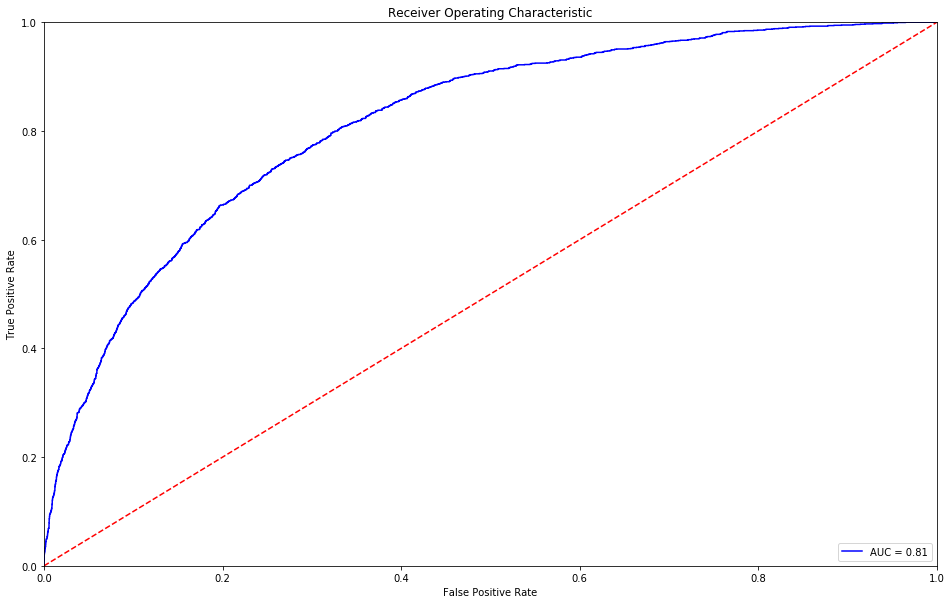

In [179]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logit_L1.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(16,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Feature Importance of L1:
One benefit of L1 Regularization is, just like Lasso (L1 Regularization) in multiple linear regression, the penalization term in absolute distance shrinks coefficients with little importance to 0 and creates a relative scale in magnitude for remaining coefficients. As we have roughly 160 features, reducing our dimensional space will likely improve our model. Another benefit is improving interpretability of the model by determining likely causes of Congestive Heart Failure based on the coefficients of blood measurements and patient attributes.

In [73]:
logit_L1.fit(X_normalized, y)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=500.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [74]:
X_normalized.columns

Index(['Anion Gapmin', 'Base Excessmin', 'Bicarbonatemin', 'Calcium, Totalmin',
       'Calculated Total CO2min', 'Chloridemin', 'Creatininemin', 'Glucosemin',
       'Hematocritmin', 'Hemoglobinmin',
       ...
       'ETHNICITY_PATIENT DECLINED TO ANSWER', 'ETHNICITY_PORTUGUESE',
       'ETHNICITY_SOUTH AMERICAN', 'ETHNICITY_UNABLE TO OBTAIN',
       'ETHNICITY_UNKNOWN/NOT SPECIFIED', 'ETHNICITY_WHITE',
       'ETHNICITY_WHITE - BRAZILIAN', 'ETHNICITY_WHITE - EASTERN EUROPEAN',
       'ETHNICITY_WHITE - OTHER EUROPEAN', 'ETHNICITY_WHITE - RUSSIAN'],
      dtype='object', length=167)

In [147]:
feat_imp = pd.DataFrame(sorted(zip(X_normalized.columns, logit_L1.coef_[0]), key=lambda x: abs(x[1]), reverse=True), columns = ['Feature Name', 'Coefficient']).head(10)
feat_imp

,Feature Name,Coefficient
0,Red Blood Cellsstd,-449.442644
1,Magnesiummean,377.963887
2,Magnesiumstd,-330.609303
3,Potassiummin,-281.386697
4,Potassiummean,215.359246
5,Potassiumstd,-183.378085
6,Magnesiummin,-160.040663
7,MCHstd,155.191657
8,Red Blood Cellsmax,-146.953729
9,"Calcium, Totalstd",-137.177953


In [158]:
import seaborn as sns

Text(0.5, 1.0, 'Top 10 Features in Logistic Regression')

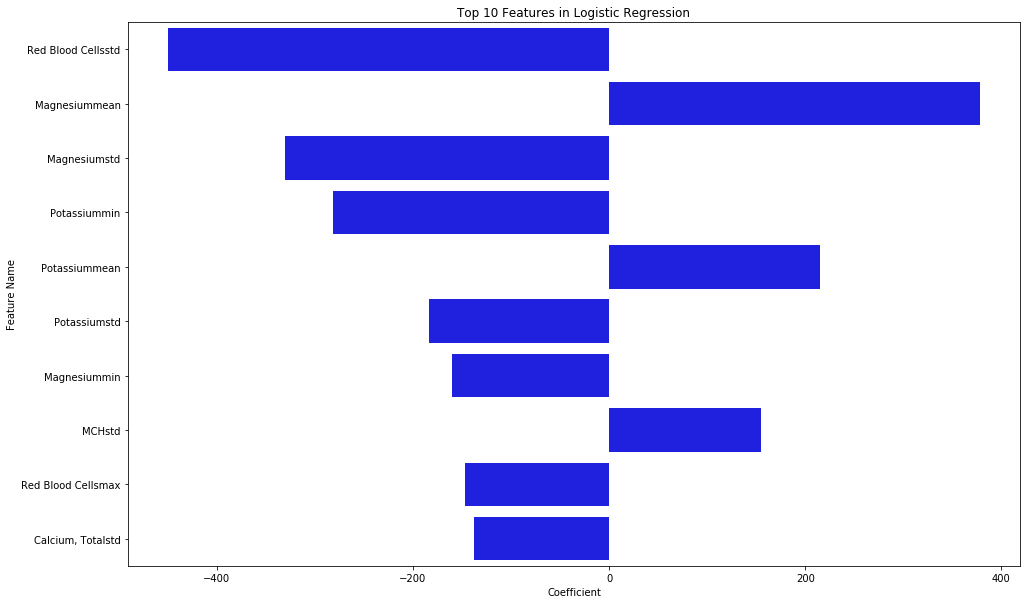

In [170]:
f, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x="Coefficient", y="Feature Name", data=feat_imp,
            label="Feature Importance", color="b")
plt.title("Top 10 Features in Logistic Regression")

## ElasticNet:
### VERSION ISSUES: Documentation in sklearn refers to ability to use ElasticNet in Logistic Regression, however, after downloading updated version, l1_ratio still does not work.
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [112]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [116]:
'''
grid_param_logit_en = [{
    "penalty": ["elasticnet"],
    "C": np.linspace(start=500.0,stop=7500.0,num=15),
    "solver": ['saga'],
    "l1_ratio": np.linspace(start=0, stop=1.0, num=11.0)
}]
grid_search_logit_en = GridSearchCV(logit, param_grid = grid_param_logit_en, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_logit_en.fit(X_train, y_train)
'''

'\ngrid_param_logit_en = [{\n    "penalty": ["elasticnet"],\n    "C": np.linspace(start=500.0,stop=7500.0,num=15),\n    "solver": [\'saga\'],\n    "l1_ratio": np.linspace(start=0, stop=1.0, num=11.0)\n}]\ngrid_search_logit_en = GridSearchCV(logit, param_grid = grid_param_logit_en, cv = 5, scoring = "roc_auc", n_jobs= -1)\n%time grid_search_logit_en.fit(X_train, y_train)\n'

In [ ]:
#ElasticNet Results:
#print("ElasticNet Results:")
#print("Best ElasticNet Params:", grid_search_logit_en.best_params_)
#print("Best Accuracy Score:", grid_search_logit_en.best_score_)
#print("Best Accuracy of Train Set:", grid_search_logit_en.score(X_train, y_train))
#print("Best Accuracy of Test Set:", grid_search_logit_en.score(X_test, y_test))

## Stochastic Gradient Descent
Setting base params:
- loss function = 'log' utilizes logistic regression.
- penalty = 'l1'
- alpha = 1e-4 penalty term in sgd is equivalent to C = 1e4 in logistic (no penalization).
- No randomness at first run (shuffle = False).

In [119]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='log', penalty= 'l1', max_iter=1e4, alpha=1e-4, shuffle=False, tol = 1e-3)

In [121]:
sgd.fit(X_train, y_train)
sgd.score(X_test, y_test)

0.785473411154345

In [124]:
confusion_matrix(y_train, sgd.predict(X_train))

array([[21174,  1765],
       [ 4757,  3144]])

In [126]:
#Sensitivity
3144/(4757+3144)

0.3979243133780534

In [132]:
sgd

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log',
       max_iter=10000.0, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

Let's try gridsearch.

In [133]:

grid_param_sgd = [{
    "alpha": np.linspace(start=0.0001,stop=10,num=15),
    "penalty": ["l1"],
    "loss":['log']
}]
grid_search_sgd = GridSearchCV(sgd, param_grid = grid_param_sgd, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_sgd.fit(X_train, y_train)

CPU times: user 1.43 s, sys: 403 ms, total: 1.84 s
Wall time: 1min


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log',
       max_iter=10000.0, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'alpha': array([1.00000e-04, 7.14379e-01, 1.42866e+00, 2.14294e+00, 2.85721e+00,
       3.57149e+00, 4.28577e+00, 5.00005e+00, 5.71433e+00, 6.42861e+00,
       7.14289e+00, 7.85716e+00, 8.57144e+00, 9.28572e+00, 1.00000e+01]), 'penalty': ['l1'], 'loss': ['log']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [134]:
print("SGD Results:")
print("Best SGD Params:", grid_search_sgd.best_params_)
print("Best Accuracy Score:", grid_search_sgd.best_score_)
print("Best Accuracy of Train Set:", grid_search_sgd.score(X_train, y_train))
print("Best Accuracy of Test Set:", grid_search_sgd.score(X_test, y_test))

SGD Results:
Best SGD Params: {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}
Best Accuracy Score: 0.8037391100807276
Best Accuracy of Train Set: 0.8081066121012472
Best Accuracy of Test Set: 0.7950012029066101


In [135]:
confusion_matrix(y, grid_search_sgd.predict(X_normalized))

array([[27179,  1543],
       [ 6724,  3104]])

In [136]:
#Sensitivity:
3104/(6724+3104)

0.31583231583231586

Refine alpha:

In [137]:
grid_param_sgd2 = [{
    "alpha": np.linspace(start=0.0001,stop=1.0,num=100),
    "penalty": ["l1"],
    "loss":['log']
}]
grid_search_sgd2 = GridSearchCV(sgd, param_grid = grid_param_sgd2, cv = 5, scoring = "roc_auc", n_jobs= -1)
%time grid_search_sgd2.fit(X_train, y_train)

CPU times: user 5.1 s, sys: 1.66 s, total: 6.76 s
Wall time: 2min 25s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log',
       max_iter=10000.0, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l1', power_t=0.5, random_state=None, shuffle=True,
       tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'alpha': array([1.000e-04, 1.020e-02, ..., 9.899e-01, 1.000e+00]), 'penalty': ['l1'], 'loss': ['log']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [138]:
print("SGD2 Results:")
print("Best SGD2 Params:", grid_search_sgd2.best_params_)
print("Best Accuracy Score:", grid_search_sgd2.best_score_)
print("Best Accuracy of Train Set:", grid_search_sgd2.score(X_train, y_train))
print("Best Accuracy of Test Set:", grid_search_sgd2.score(X_test, y_test))

SGD2 Results:
Best SGD2 Params: {'alpha': 0.0001, 'loss': 'log', 'penalty': 'l1'}
Best Accuracy Score: 0.8055303211067808
Best Accuracy of Train Set: 0.8078049696018351
Best Accuracy of Test Set: 0.7944517514203586


### Adjust cutoff threshold

In [141]:
#Set params for fitting from optimal models from grid search:
from sklearn.linear_model import SGDClassifier
sgd_opt = SGDClassifier(loss='log', penalty= 'l1', max_iter=1e4, alpha=1e-4, shuffle=False, tol = 1e-3)
sgd_opt.fit(X_train, y_train)
print("Optimal Cutoff for SGD:", Find_Optimal_Cutoff(y_train, sgd_opt.predict_proba(X_train)[:,1]))

Optimal Cutoff for SGD: [0.2861500543829092]


In [142]:
sgd_predictions = (sgd_opt.predict_proba(X_train)[:,1] > 0.28615).astype(int)
print("SGD New Cutoff Confusion Matrix:")
print(confusion_matrix(y_train, sgd_predictions))

SGD New Cutoff Confusion Matrix:
[[16721  6218]
 [ 2141  5760]]


In [143]:
print("SGD New Cutoff Accuracy Score:", sgd_opt.score(X_test, y_test))
print("SGD New Cutoff Sensitivity:", 5760/(2141+5760))

SGD New Cutoff Accuracy Score: 0.785473411154345
SGD New Cutoff Sensitivity: 0.7290216428300215


**Results:** By moving the cutoff threshold, we've lost 1.6% Accuracy (Baseline 80.1%, Now 79.6%); however, we've increased the Sensitivity of our model by 30.6% (Baseline: 42.3%, Now 72.9%) using Stochastic Gradient Descent. While this is very good, this model is 2% less sensitive than our optimal Logistic Regression.